**<h4>Imports</h4>**

In [18]:
# Packages
import IPython
import librosa
import librosa.display as lplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import sklearn.ensemble as ske
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp

# Models - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.model_selection import cross_validate

**<h4>Exploratory Data Analysis</h4>**

In [3]:
df = pd.read_csv('features_30_sec.csv')
print(df.shape)
df.head(100)

(1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blues.00095.wav,661794,0.369944,0.091291,0.187093,0.002157,1388.635157,509489.418203,1773.023640,164770.603592,...,59.609543,-4.846665,76.014030,-5.967407,66.805000,-2.789360,51.622269,-6.488822,67.523346,blues
96,blues.00096.wav,661794,0.260525,0.091813,0.051400,0.000858,1132.135958,319127.465671,1582.635546,151263.927431,...,169.111008,-5.682142,149.492767,1.569424,165.521057,0.889100,176.933533,-7.959035,138.088654,blues
97,blues.00097.wav,661794,0.375062,0.093856,0.198329,0.002949,1236.230772,422824.333777,1601.921981,295866.241434,...,95.229355,-15.740178,69.669884,-5.620852,102.523972,-5.787607,54.506149,-0.037583,55.425610,blues
98,blues.00098.wav,661794,0.442966,0.078316,0.125455,0.001709,2310.498240,191255.537131,2206.581011,62348.600432,...,44.744358,-11.147454,36.118103,1.159217,45.358360,-3.912875,60.196030,3.235770,44.576633,blues


In [4]:
df.label.value_counts().reset_index()

,index,label
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


In [5]:
audio_sample = "./Data/genres_original/rock/rock.00000.wav"
audio_data, sr = librosa.load(audio_sample, offset=0, duration=30)
audio_data, _ = librosa.effects.trim(audio_data)
audio_data.shape

(661500,)

In [6]:
collection = np.split(audio_data, 10)
collection

[array([-0.03344727, -0.05490112, -0.05435181, ..., -0.3314209 ,
        -0.2786255 , -0.1612854 ], dtype=float32),
 array([-0.03897095,  0.00033569,  0.03417969, ..., -0.20111084,
        -0.25308228, -0.21737671], dtype=float32),
 array([-0.13061523, -0.09729004, -0.03594971, ..., -0.05691528,
        -0.10571289, -0.14959717], dtype=float32),
 array([-0.12643433, -0.08251953, -0.1187439 , ..., -0.01855469,
        -0.02658081, -0.03070068], dtype=float32),
 array([-0.02822876, -0.01763916, -0.00491333, ..., -0.00387573,
         0.00039673,  0.00708008], dtype=float32),
 array([ 0.00177002, -0.01235962, -0.03747559, ..., -0.02783203,
         0.02203369,  0.05661011], dtype=float32),
 array([0.10159302, 0.11853027, 0.09390259, ..., 0.26696777, 0.27514648,
        0.25500488], dtype=float32),
 array([0.15740967, 0.09320068, 0.03945923, ..., 0.01309204, 0.02047729,
        0.02539062], dtype=float32),
 array([0.02688599, 0.02877808, 0.03234863, ..., 0.18200684, 0.24108887,
        0.1

In [7]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

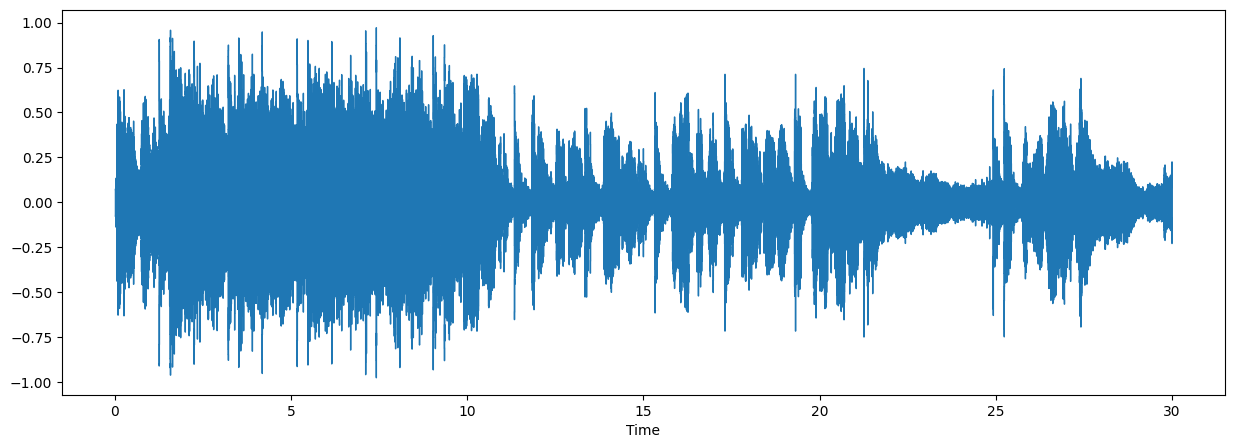

In [8]:
plt.figure(figsize=(15,5))
lplt.waveshow(audio_data)
plt.show()

/home/maoouu/Python/CS_THESIS/.venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


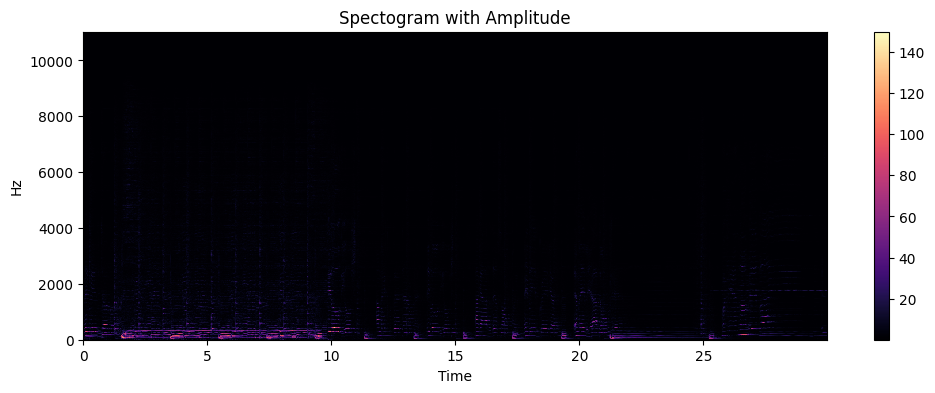

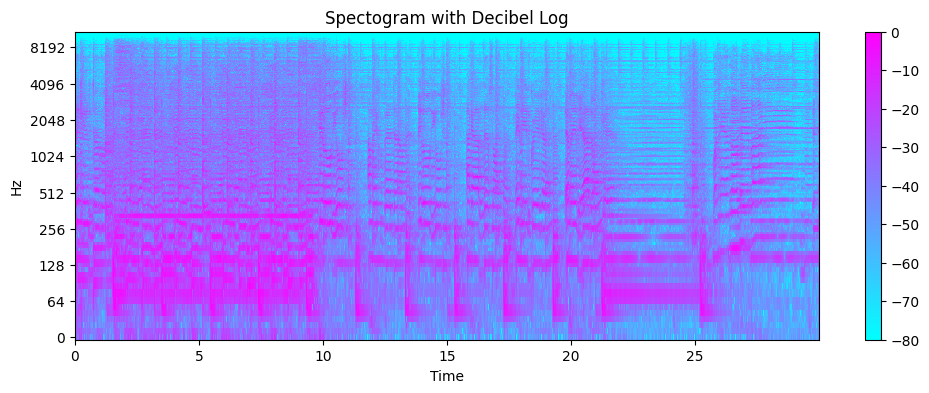

In [10]:
n_fft = 2048
hop_length = 512 # window hop length for STFT

stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

plt.figure(figsize=(12,4))
lplt.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("Spectogram with Amplitude")
plt.show()

plt.figure(figsize=(12,4))
lplt.specshow(stft_db, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Spectogram with Decibel Log")
plt.show()

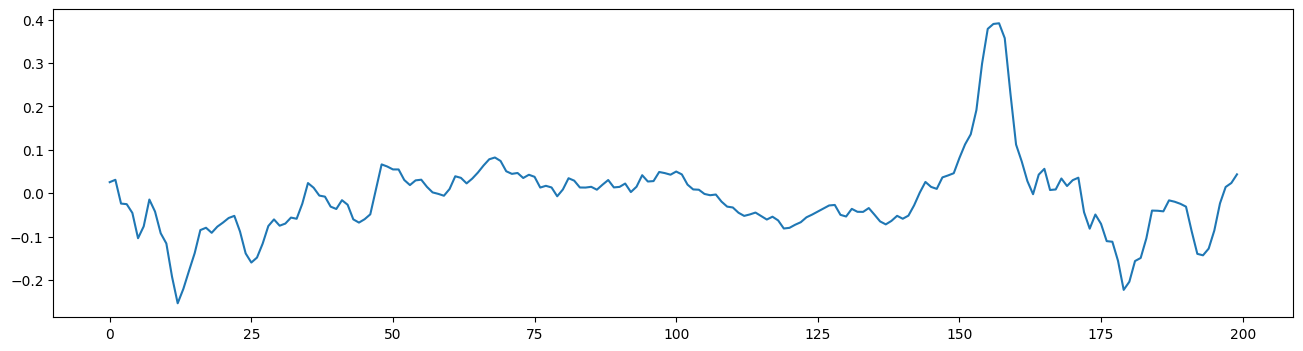

In [12]:
# plot zoomed audio wave
start = 1000
end = 1200
plt.figure(figsize=(16,4))
plt.plot(audio_data[start:end])
plt.show()

/tmp/ipykernel_621/4266616634.py:1: FutureWarning: Pass y=[-0.03344727 -0.05490112 -0.05435181 ... -0.1289978  -0.14007568
 -0.08935547] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)


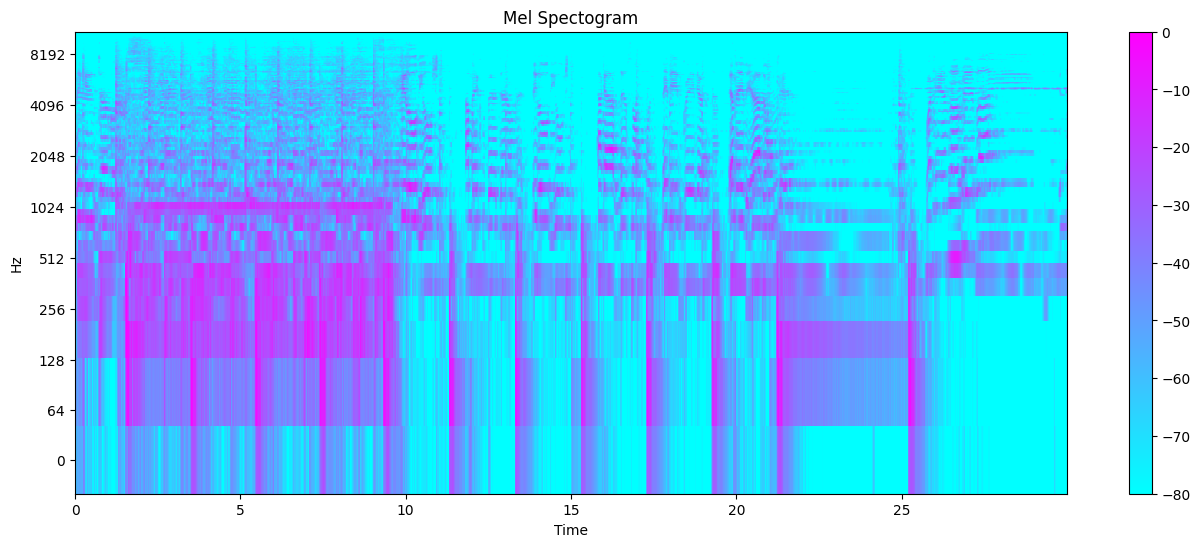

In [13]:
mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
plt.figure(figsize=(16,6))
lplt.specshow(mel_spec_db, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("Mel Spectogram")
plt.show()

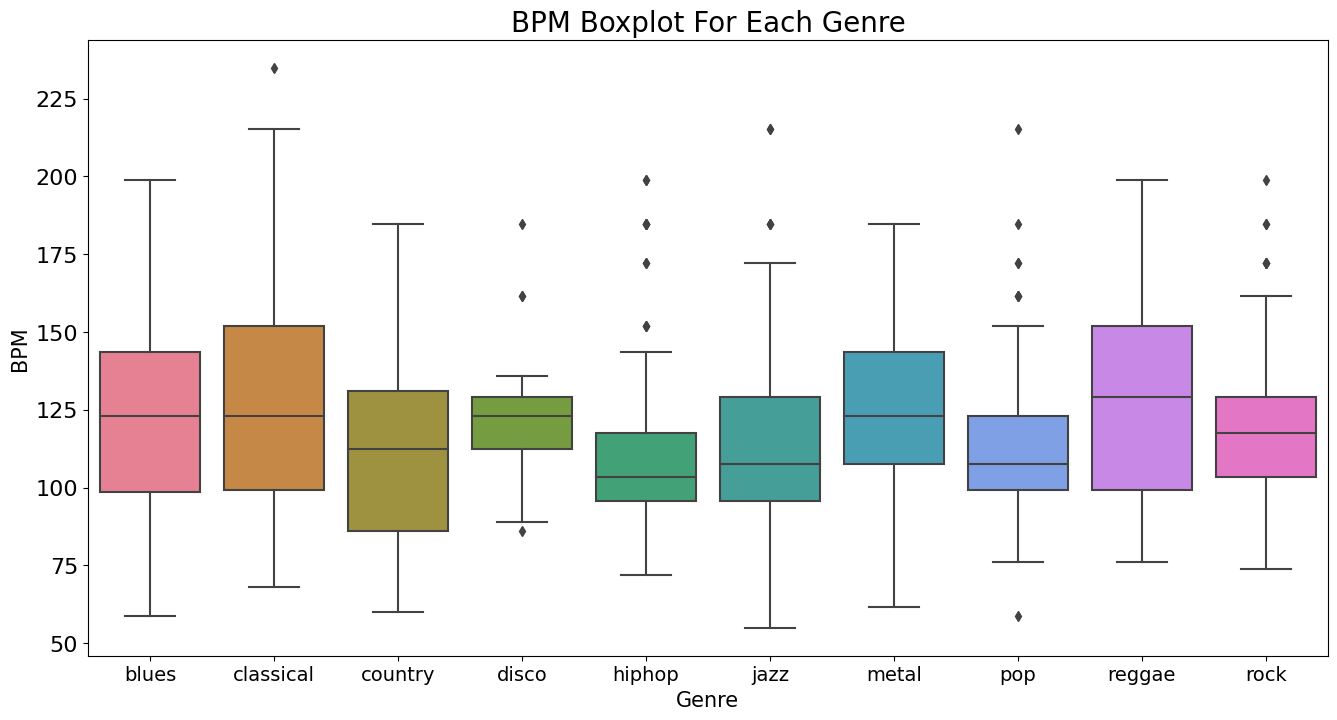

In [17]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='label', y='tempo', data=x, palette='husl')

plt.title('BPM Boxplot For Each Genre', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)
plt.savefig("BPM_Boxplot.png")

In [19]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [20]:
# Find all columns with any NA values
print("Columns with NA values are", list(df.columns[df.isnull().any()]))

Columns with NA values are []


**<h4>Encode Genre Label</h4>**

In [48]:
# map labels to index
label_index = dict()
index_label= dict()

for i, x in enumerate(df.label.unique()):
    label_index[x] = i
    index_label[i] = x

print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


**<h4>Split Train Dev & Test Sets</h4>**

In [49]:
seed = 12
np.random.seed(seed)

In [50]:
# shuffle samples
df_shuffle = df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [51]:
# remove irrelevant columns
df_shuffle.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_shuffle.pop('label')
df_X = df_shuffle

# split into train dev and test
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)

In [53]:
for x, y in {'Train set': X_train, 'Dev set': X_dev, 'Test set': X_test}.items():
    print(f"{x} has {y.shape[0]} records out of {len(df_shuffle)} ({round(y.shape[0] / len(df_shuffle) * 100)}%)")


Train set has 700 records out of 1000 (70%)
Dev set has 198 records out of 1000 (20%)
Test set has 102 records out of 1000 (10%)


In [55]:
for item in [y_train, y_dev, y_test]:
    print(item.value_counts()[0] / item.shape[0] * 100)

10.0
10.1010101010101
10.784313725490197


**<h4>Scale The Features</h4>**

In [56]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)